In [1]:
import gym
import ray
from ray.rllib.agents.ppo import PPOTrainer
from ray.rllib.agents.dqn import DQNTrainer
from scouting_gym.scouting_env_real import ScoutingEnvInference
from gym.envs.registration import register
from IPython.display import clear_output

register(
    id='Scouting-inference-v0',
    entry_point='scouting_gym.scouting_env_real:ScoutingEnvInference'
)

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
env = gym.make('Scouting-inference-v0')

print(env.observation_space)

[ERROR] [1612360131.815007]: TF not ready yet, retrying for getting tf msg
[ERROR] [1612360133.117211]: TF not ready yet, retrying for getting tf msg
[ERROR] [1612360134.620488]: TF not ready yet, retrying for getting tf msg
[ERROR] [1612360135.651778]: TF not ready yet, retrying for getting tf msg


Box(0.0, 1.0, (84, 84, 4), float32)


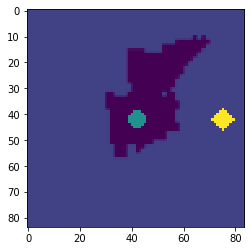

In [3]:
env.target_p = (1., 3.7)
import matplotlib.pyplot as plt
import numpy as np
obs = env.reset()
plt.imshow(obs[:, :, 0])

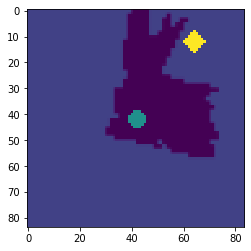

In [4]:
import time
time_now = time.time()
_ = env.reset()
print(time.time()-time_now)
for _ in range(2):
    #obs, reward, done, _ = env.step(1)
    obs, reward, done, _ = env.step(1)

    clear_output(wait=True)
    #plt.imshow(obs[:, :, 0])
    if done:
        print('break')
_ = env.reset()
plt.imshow(obs[:, :, 0])

In [ ]:
plt.imshow(obs[:, :, 0], cmap='gray')

In [ ]:
plt.imshow(obs[:, :, 1], cmap='gray')

In [ ]:
plt.imshow(obs[:, :, 2], cmap='gray')

In [ ]:
plt.imshow(obs[:, :, 3], cmap='gray')

In [ ]:
obs[:, :, 3].mean()

In [4]:
ray.init()

2021-02-03 14:49:22,451	INFO resource_spec.py:223 -- Starting Ray with 5.96 GiB memory available for workers and up to 2.98 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2021-02-03 14:49:23,336	INFO services.py:1191 -- View the Ray dashboard at localhost:8265


{'node_ip_address': '192.168.178.21',
 'raylet_ip_address': '192.168.178.21',
 'redis_address': '192.168.178.21:6379',
 'object_store_address': '/tmp/ray/session_2021-02-03_14-49-22_446036_29612/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-02-03_14-49-22_446036_29612/sockets/raylet',
 'webui_url': 'localhost:8265',
 'session_dir': '/tmp/ray/session_2021-02-03_14-49-22_446036_29612'}

In [5]:
config = {
    "env": ScoutingEnvInference,  # or "corridor" if registered above
    # Use GPUs iff `RLLIB_NUM_GPUS` env var set to > 0.

    "num_gpus": 1,
    "num_workers": 1,  # parallelism
}

In [6]:
def load(checkpoint_path, config):
    """
    Load a trained RLlib agent from the specified path. Call this before testing a trained agent.
    :param path: Path pointing to the agent's saved checkpoint (only used for RLlib agents)
    """
    agent = PPOTrainer(config=config)
    agent.restore(checkpoint_path)
    return agent
import numpy as np
from gym import spaces
def test(agent, env):
    """Test trained agent for a single episode. Return the episode reward"""
    # instantiate env class

    # run until episode ends
    episode_reward = 0
    done = False
    obs = env.reset()
    while not done:
        action = agent.compute_action(obs)
        obs, reward, done, info = env.step(action)
        clear_output(wait=True)
        episode_reward += reward
    env.reset()
    return episode_reward

In [7]:
checkpoint_path = '/home/dschori/Downloads/checkpoint_50/checkpoint-50'

In [8]:
agent = load(checkpoint_path=checkpoint_path, config=config)

2021-02-03 14:49:27,329	INFO trainer.py:605 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-02-03 14:49:27,336	INFO trainer.py:630 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=29768) WARNING:tensorflow:From /home/dschori/.local/lib/python3.8/site-packages/tensorflow/python/compat/v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=29768) Instructions for updating:
(pid=29768) non-resource variables are not supported in the long term
2021-02-03 14:49:38,379	INFO trainable.py:248 -- Trainable.setup took 11.052 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2021-02-03 14:49:38,380	WARNING util.py:37 -- Install gputil for GPU system monitoring.
2021-02-03 14:49:38,584	INFO trainable.py:472 -- Restored on 192.1

In [9]:
import time
time_now = time.time()
action = agent.compute_action(env.observation_space.sample())
print(time.time() - time_now)

0.1581437587738037


In [41]:
env.target_p = (1.7, -1.9)

env.target_p = (2.1, 3.9)

In [43]:
episode_reward = test(agent=agent, env=env)
episode_reward

118.38150713838

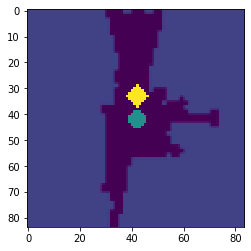

In [42]:
import matplotlib.pyplot as plt
obs = env.reset()
plt.imshow(obs[:, :, 0])

In [30]:
agent.compute_action(env.reset())

2